In [118]:
import pandas as pd
import numpy as np
import plotly.io as pio
import plotly.express as px
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import matplotlib.patches
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from math import sqrt
from io import BytesIO
from zipfile import ZipFile
from urllib.request import urlopen
from os import listdir
import warnings

warnings.filterwarnings('ignore')

Descomprime los ZIP y descarga los Csv

In [119]:
with open('folder.txt', 'r') as folder:
    lines = folder.readlines()
    
folder_archivos =  ' '.join(lines)

csv_files = []

In [120]:
def find_csv_filenames( path_to_dir, suffix=".csv" ):
    filenames = listdir(path_to_dir)
    return [ filename for filename in filenames if filename.endswith( suffix ) ]

csv_files = [l for l in find_csv_filenames(folder_archivos, suffix=".csv" ) if 'autos' in l]

In [121]:
with open('urls.txt', 'r') as folder_urls:
    lines_urls = folder_urls.readlines()

if len(csv_files) == 0:
    zipurls = lines_urls

    for zipurl in zipurls:
        with urlopen(zipurl) as zipresp:
            with ZipFile(BytesIO(zipresp.read())) as zfile:
                zfile.extractall(folder_archivos)

Lee todos los Csv de la carpeta

In [122]:
list_data_frames = []

for file in csv_files:
    df_new = pd.read_csv(file)
    list_data_frames.append(df_new)

In [123]:
df = pd.concat(list_data_frames, ignore_index=True)

df.shape

(7414431, 27)

In [124]:
df.head(6)

,tramite_tipo,tramite_fecha,fecha_inscripcion_inicial,registro_seccional_codigo,registro_seccional_descripcion,registro_seccional_provincia,automotor_origen,automotor_anio_modelo,automotor_tipo_codigo,automotor_tipo_descripcion,...,titular_domicilio_localidad,titular_domicilio_provincia,titular_genero,titular_anio_nacimiento,titular_pais_nacimiento,titular_porcentaje_titularidad,titular_domicilio_provincia_indec_id,titular_pais_nacimiento_indec_id,titular_domicilio_provincia_id,titular_pais_nacimiento_id
0,TRANSFERENCIA NACIONAL,2018-09-06,1999-07-08,1001,ADROGUE Nº 1,Buenos Aires,Nacional,1999.0,NaN,SEDAN,...,VILLA LA FLORIDA,BUENOS AIRES,Masculino,1995.0,Argentina,100,6.0,ARG,NaN,NaN
1,TRANSFERENCIA NACIONAL,2018-09-19,1994-07-05,1001,ADROGUE Nº 1,Buenos Aires,Nacional,1994.0,NaN,BERLINA 5 PTAS,...,BURZACO,BUENOS AIRES,Masculino,1965.0,Argentina,100,6.0,ARG,NaN,NaN
2,TRANSFERENCIA NACIONAL,2018-09-24,2008-06-04,1001,ADROGUE Nº 1,Buenos Aires,Nacional,2008.0,NaN,FURGON 600,...,VIRREY DEL PINO,BUENOS AIRES,Masculino,1990.0,Argentina,100,6.0,ARG,NaN,NaN
3,TRANSFERENCIA NACIONAL,2018-09-28,2009-10-13,1001,ADROGUE Nº 1,Buenos Aires,Nacional,2009.0,NaN,FURGON 600,...,LONGCHAMPS,BUENOS AIRES,Masculino,1963.0,Argentina,100,6.0,ARG,NaN,NaN
4,TRANSFERENCIA NACIONAL,2018-09-28,1979-05-30,1001,ADROGUE Nº 1,Buenos Aires,Nacional,1979.0,NaN,MICROOMNIBUS,...,LA BANDA PADILLA,BUENOS AIRES,Masculino,1971.0,Argentina,100,6.0,ARG,NaN,NaN
5,TRANSFERENCIA NACIONAL,2018-09-28,1979-05-30,1001,ADROGUE Nº 1,Buenos Aires,Nacional,1979.0,NaN,MICROOMNIBUS,...,C.AUTONOMA DE BS.AS,BUENOS AIRES,No aplica,1994.0,No aplica,100,6.0,NaN,NaN,NaN


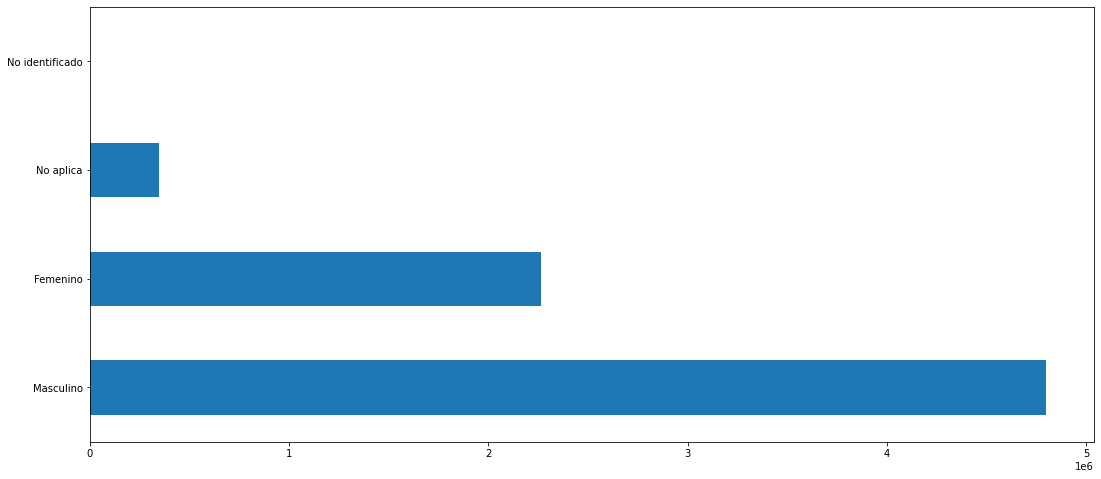

In [125]:
df.titular_genero.value_counts().plot(kind='barh');

In [126]:
df["tramite_fecha"] = pd.to_datetime(df["tramite_fecha"])

df = df.pivot_table(index='tramite_fecha',
               columns='registro_seccional_provincia',
               aggfunc=len,
               fill_value=0)

df.columns = df.columns.droplevel(0) 
df.columns.name = None              
df = df.reset_index()    

df = df.loc[:,~df.apply(lambda x: x.duplicated(),axis=1).all()].copy()


df.head(5)

,tramite_fecha,Buenos Aires,Catamarca,Chaco,Chubut,Ciudad Autónoma de Bs.As.,Corrientes,Córdoba,Entre Ríos,Formosa,...,Neuquén,Río Negro,Salta,San Juan,San Luis,Santa Cruz,Santa Fe,Santiago del Estero,Tierra del Fuego,Tucumán
0,2018-01-02,2719,43,94,145,594,178,877,271,44,...,123,182,130,89,106,70,724,74,39,157
1,2018-01-03,2809,45,141,134,672,184,737,285,42,...,141,182,69,95,112,49,623,51,41,167
2,2018-01-04,2857,30,121,139,714,157,760,286,43,...,163,169,118,108,110,81,689,68,50,182
3,2018-01-05,2884,46,122,162,757,179,838,300,56,...,161,171,103,121,116,72,643,71,55,149
4,2018-01-06,7,0,0,0,0,0,0,0,0,...,0,13,5,0,0,6,0,0,0,0


In [127]:
#df_dolar = pd.read_csv('dolarfinal.csv')

#df_dolar.head(5)

In [128]:
#df.set_index('tramite_fecha', inplace = True)

In [129]:
#df_dolar.set_index('Fecha', inplace = True)

In [130]:
#df = pd.merge(df, df_dolar, left_index=True, right_index=True)

In [131]:
df["sum"] = df[df.columns[1:]].sum(axis=1)

In [132]:
df["sum"].describe()

count    1315.000000
mean     5638.350570
std      2798.529663
min         1.000000
25%      6003.000000
50%      6866.000000
75%      7338.500000
max      8877.000000
Name: sum, dtype: float64

In [133]:
df_copy = df.copy()
df_g = df[df['sum'] > 6000]

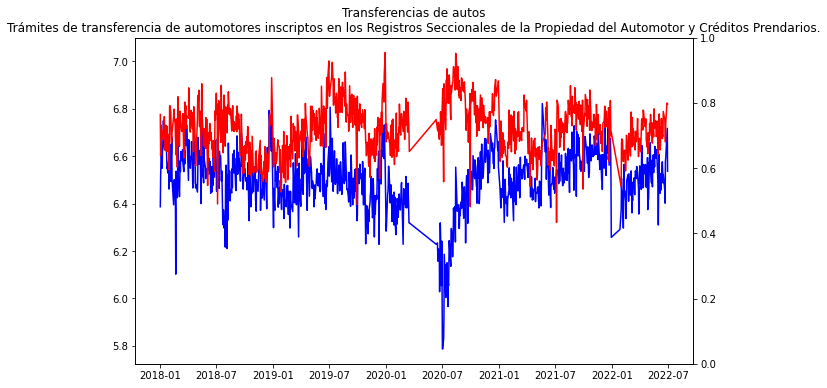

In [151]:
import pandas as pd 
import matplotlib.pyplot as plt 
plt.rcParams["figure.figsize"] = (10,6)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(df_g['tramite_fecha'], np.log(df_g['Ciudad Autónoma de Bs.As.']), label="Ciudad Autónoma de Bs.As.",  c="b");
ax1.plot(df_g['tramite_fecha'], np.log(df_g['Córdoba']), label="Córdoba",  c="r");

plt.title('Transferencias de autos\nTrámites de transferencia de automotores inscriptos en los Registros Seccionales de la Propiedad del Automotor y Créditos Prendarios.')
plt.show()

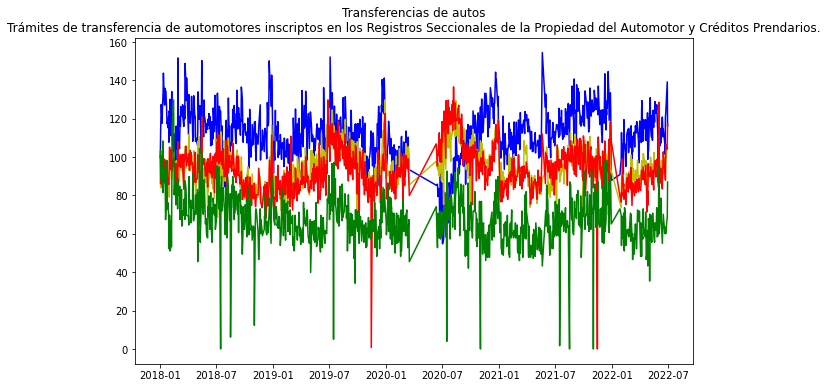

In [152]:

fig = plt.figure()
ax  = plt.axes()

ax.plot(df_g['tramite_fecha'], df_g['Ciudad Autónoma de Bs.As.'].div(df_g['Ciudad Autónoma de Bs.As.'].iloc[0]).mul(100), label="Ciudad Autónoma de Bs.As.",  c="b");
ax.plot(df_g['tramite_fecha'], df_g['Córdoba'].div(df_g['Córdoba'].iloc[0]).mul(100), label="cordoba_norm",  c="y");
ax.plot(df_g['tramite_fecha'], df_g['Santa Fe'].div(df_g['Santa Fe'].iloc[0]).mul(100), label="santafe_norm",  c="r");
ax.plot(df_g['tramite_fecha'], df_g['Corrientes'].div(df_g['Corrientes'].iloc[0]).mul(100), label="corrientes_norm",  c="g");
plt.title('Transferencias de autos\nTrámites de transferencia de automotores inscriptos en los Registros Seccionales de la Propiedad del Automotor y Créditos Prendarios.')
plt.show()

In [136]:
df['año'] = pd.DatetimeIndex(df['tramite_fecha']).year
df['mes_año'] = pd.to_datetime(df['tramite_fecha']).dt.to_period('M')
df.head(5)

,tramite_fecha,Buenos Aires,Catamarca,Chaco,Chubut,Ciudad Autónoma de Bs.As.,Corrientes,Córdoba,Entre Ríos,Formosa,...,San Juan,San Luis,Santa Cruz,Santa Fe,Santiago del Estero,Tierra del Fuego,Tucumán,sum,año,mes_año
0,2018-01-02,2719,43,94,145,594,178,877,271,44,...,89,106,70,724,74,39,157,7385,2018,2018-01
1,2018-01-03,2809,45,141,134,672,184,737,285,42,...,95,112,49,623,51,41,167,7386,2018,2018-01
2,2018-01-04,2857,30,121,139,714,157,760,286,43,...,108,110,81,689,68,50,182,7630,2018,2018-01
3,2018-01-05,2884,46,122,162,757,179,838,300,56,...,121,116,72,643,71,55,149,7796,2018,2018-01
4,2018-01-06,7,0,0,0,0,0,0,0,0,...,0,0,6,0,0,0,0,31,2018,2018-01


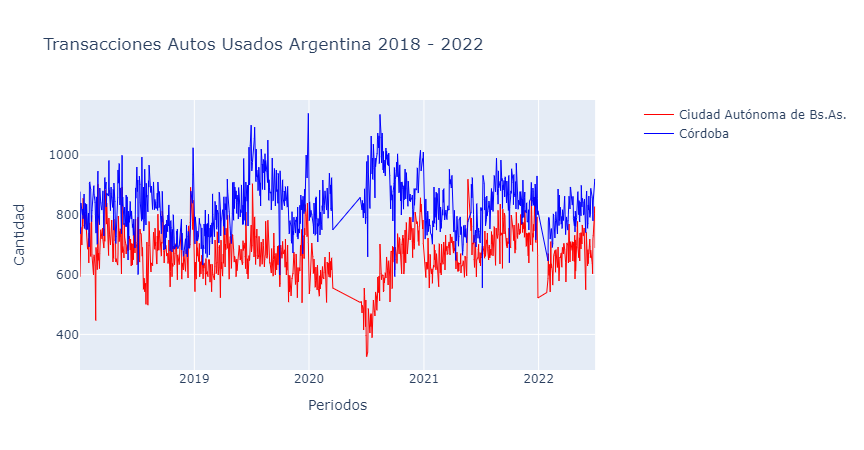

In [153]:
from plotly.subplots import make_subplots
def get_line_plot(dataframe, x, y1, y2, titulo):
    subfig = make_subplots(specs=[[{"secondary_y": True}]])

    fig  = px.line(dataframe, x=x, y=y1)

    fig2 = px.line(dataframe, x=x,y=y2)

    fig.update_layout(xaxis_rangeslider_visible=True)
    fig.update_traces(showlegend=True,name=y1,line_color='red', line_width=1)
    fig2.update_traces(showlegend=True,name=y2,line_color='#0000ff', line_width=1) #, yaxis="y2"
    subfig.add_traces(fig.data + fig2.data)

    subfig.layout.xaxis.title ="Periodos"
    subfig.layout.yaxis.title ="Cantidad"
    subfig.layout.yaxis2.title="Cantidad"
    subfig.layout.title=titulo 

    return subfig.show()

get_line_plot(df_g, "tramite_fecha", "Ciudad Autónoma de Bs.As.", "Córdoba", "Transacciones Autos Usados Argentina 2018 - 2022")

In [138]:
df_g.head()

,tramite_fecha,Buenos Aires,Catamarca,Chaco,Chubut,Ciudad Autónoma de Bs.As.,Corrientes,Córdoba,Entre Ríos,Formosa,...,Río Negro,Salta,San Juan,San Luis,Santa Cruz,Santa Fe,Santiago del Estero,Tierra del Fuego,Tucumán,sum
0,2018-01-02,2719,43,94,145,594,178,877,271,44,...,182,130,89,106,70,724,74,39,157,7385
1,2018-01-03,2809,45,141,134,672,184,737,285,42,...,182,69,95,112,49,623,51,41,167,7386
2,2018-01-04,2857,30,121,139,714,157,760,286,43,...,169,118,108,110,81,689,68,50,182,7630
3,2018-01-05,2884,46,122,162,757,179,838,300,56,...,171,103,121,116,72,643,71,55,149,7796
6,2018-01-08,2711,35,130,165,699,162,803,293,47,...,188,142,96,71,62,641,85,39,137,7393


In [140]:
columnas = []
values   = []

for i in range(len(df_g.drop(columns = ['sum']).columns)):
    try:
        i += 1
        columnas.append(df_g.drop(columns = ['sum']).columns[i])
        values.append(df_g[df_g.drop(columns = ['sum']).columns[i]].sum())
    except:
        continue

df_group = pd.DataFrame({'indice': columnas, 'n' : values}).sort_values(by = 'n', ascending = False)

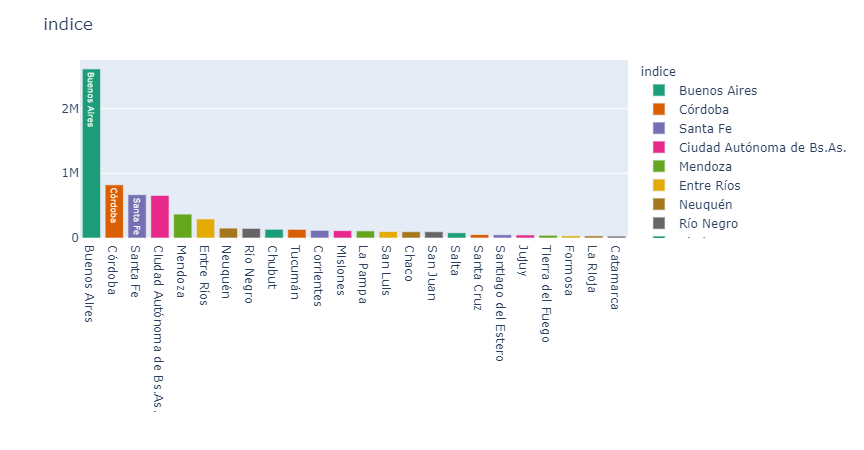

In [141]:
def plot_hbar(df, col, n):
    fig = px.bar(df, 
                 x=col, y="n", 
                 text=col, orientation='v', width=700,  color='indice',
                 color_discrete_sequence = px.colors.qualitative.Dark2)
    fig.update_layout(title=col, xaxis_title="", yaxis_title="", 
                      yaxis_categoryorder = 'total ascending',
                      uniformtext_minsize=8, uniformtext_mode='hide')
    fig.show()
    
plot_hbar(df_group, 'indice', 15)

In [142]:
df_mes = df.groupby('mes_año')[df.columns.drop(["tramite_fecha", 'año', 'mes_año'])].sum().reset_index()

In [ ]:
'''
from datetime import datetime

año_string = "20200704"

dt   = datetime.strptime(año_string,'%Y%m%d').date()

print(dt)


min_seg = "02:00"

dt   = datetime.strptime(min_seg,'%M:%S').time()
        
        
print(dt)
'''

In [143]:
df_mes["mes_año"] = [d.to_timestamp() for d in df_mes["mes_año"].values]

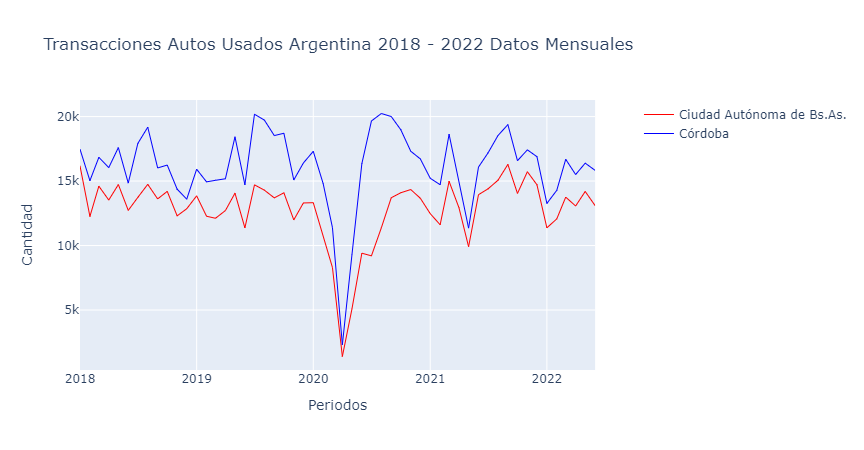

In [144]:
get_line_plot(df_mes, "mes_año", "Ciudad Autónoma de Bs.As.", "Córdoba", "Transacciones Autos Usados Argentina 2018 - 2022 Datos Mensuales")

Hacemos un grafico QQ Plot que se  utiliza para explicar la distribucion de un conjunto de datos

En el eje de las Y estan los precios de los valores, 
ordenados de menor a mayor, en el eje de las X estan los cuantiles teoricos que miden a 
cuantas desviaciones estandard de la media esta cada uno de los valores. 
La linea roja representa como se deberian distribuir los valores si siguiera una distribucion normal. 
En este caso en el valor 500 podemos ver una gran diferencia, 
por lo tanto los datos no se distribuyen de forma normal y no podremos usar la serie para pronosticos 
del futuro usando la distribucion normal.

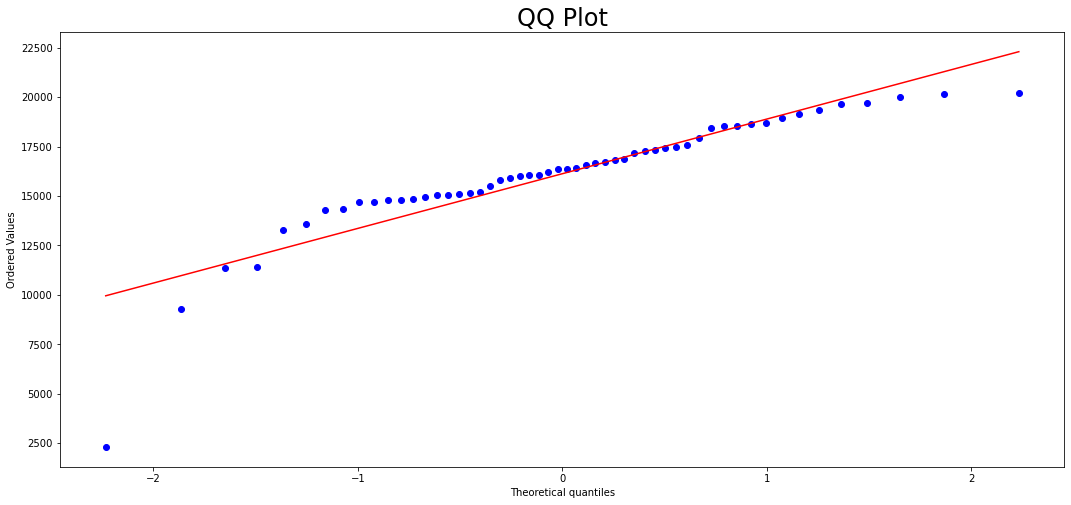

In [148]:



import scipy.stats

scipy.stats.probplot(df_mes["Córdoba"], plot = plt)
plt.title('QQ Plot', size = 24)
plt.show()

In [147]:
df_mes["mes_año"] = pd.to_datetime(df_mes["mes_año"])
df_mes['año'] = pd.to_datetime(df_mes["mes_año"]).dt.year
df_mes.to_csv(r'cars.csv')

In [146]:
df_filter = df_mes[(df_mes['año'] != 2020)]